In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
elte_stress_field = pd.read_csv('./elte_stress_field/dat.log', sep=" ", header=None, skiprows=[0])

In [33]:
elte_stress_field.columns = ['simulation time',
'number of successful steps',
'number of failed steps',
'worst error ratio squared',
'average speed of the dislocations',
'cutoff (used in the semi implicit scheme)',
'order parameter',
'value of the external stress',
'computation time between the last two successful steps',
'accumulated strain',
'average v2',
'energy of the system']

In [34]:
elte_stress_field

"""
./sdddst --dislocation-configuration test_input.dat --result-dislocation-configuration test_output.dat
--logfile-path dat.log --time-limit 0.002818  --periodic-stress-field-elte .
"""

,simulation time,number of successful steps,number of failed steps,worst error ratio squared,average speed of the dislocations,cutoff (used in the semi implicit scheme),order parameter,value of the external stress,computation time between the last two successful steps,accumulated strain,average v2,energy of the system
0,0.000001,1,0,1.219163e-17,3.583825,3.779645e+19,-,0.0,0.000311,-,1.637409e+02,0.000164
1,0.000003,2,0,4.147598e-16,3.584704,3.779645e+19,-,0.0,0.106507,-,1.638358e+02,0.000459
2,0.000006,3,0,1.413210e-14,3.586287,3.779645e+19,-,0.0,0.084504,-,1.640069e+02,0.000990
3,0.000012,4,0,4.821664e-13,3.589140,3.779645e+19,-,0.0,0.074204,-,1.643155e+02,0.001947
4,0.000022,5,0,1.606336e-11,3.594282,3.779645e+19,-,0.0,0.082342,-,1.648730e+02,0.003675
5,0.000041,6,0,2.456512e-09,3.603724,3.779645e+19,-,0.0,0.093140,-,1.659016e+02,0.006800
6,0.000075,7,0,2.077245e-08,3.620843,3.779645e+19,-,0.0,0.071096,-,1.677805e+02,0.012475
7,0.000136,8,0,1.581303e-06,3.652457,3.779645e+19,-,0.0,0.071186,-,1.712993e+02,0.022854
8,0.000247,9,0,1.154831e-04,3.712013,3.779645e+19,-,0.0,0.080002,-,1.781024e+02,0.042101
9,0.000445,10,0,5.145342e-03,3.828890,3.779645e+19,-,0.0,0.093430,-,1.921082e+02,0.078788


In [35]:
import seaborn as sns

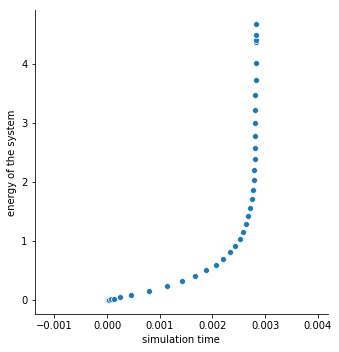

In [36]:
sns.pairplot(elte_stress_field, x_vars='simulation time', y_vars='energy of the system', height=5)
plt.savefig('t_energy.png', dpi=100)

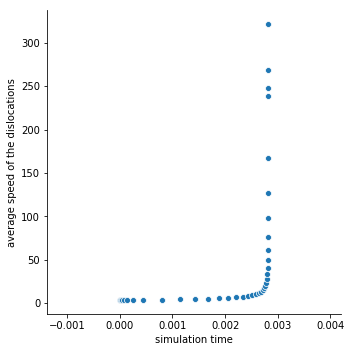

In [37]:
sns.pairplot(elte_stress_field, x_vars='simulation time', y_vars='average speed of the dislocations', height=5)
plt.savefig('t_speed.png', dpi=100)

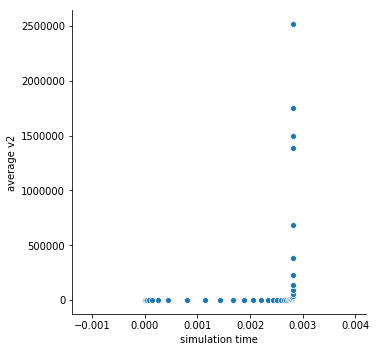

In [38]:
sns.pairplot(elte_stress_field, x_vars='simulation time', y_vars='average v2', height=5)
plt.savefig('t_speed2.png', dpi=100)

In [42]:
import os

analytics = [pd.read_csv('./analytic_stress_field/' + file, header=None, sep=" ", skiprows=[0]) 
             for file in os.listdir('./analytic_stress_field/')]

for analytic in analytics:
    analytic.columns = ['simulation time',
                            'number of successful steps',
                            'number of failed steps',
                            'worst error ratio squared',
                            'average speed of the dislocations',
                            'cutoff (used in the semi implicit scheme)',
                            'order parameter',
                            'value of the external stress',
                            'computation time between the last two successful steps',
                            'accumulated strain',
                            'average v2', 'energy of the system']

In [43]:
def saveImages(df, i):
    sns.pairplot(df, x_vars='simulation time', y_vars='energy of the system', height=5, )
    plt.savefig('t_energy_%s.png' % i, dpi=100)
    sns.pairplot(df, x_vars='simulation time', y_vars='average speed of the dislocations', height=5)
    plt.savefig('t_speed_%s.png' % i, dpi=100)
    sns.pairplot(df, x_vars='simulation time', y_vars='average v2', height=5)
    plt.savefig('t_speed2_%s.png' % i, dpi=100)

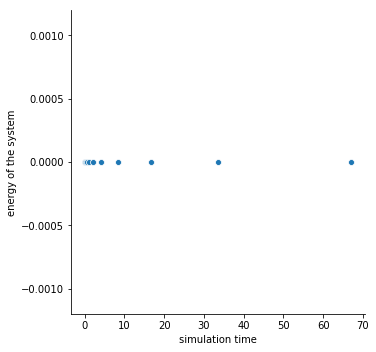

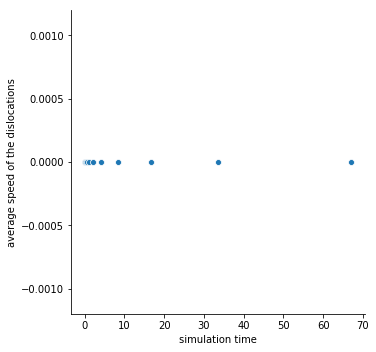

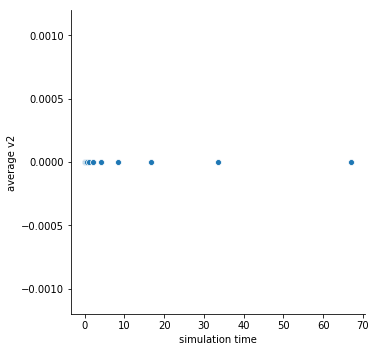

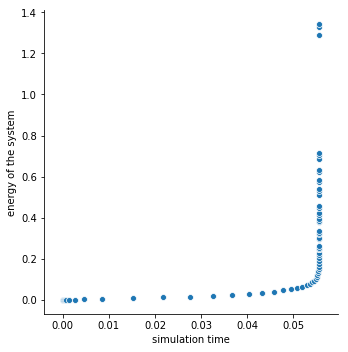

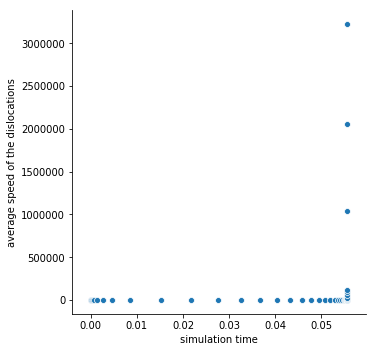

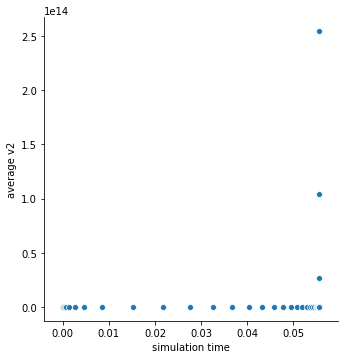

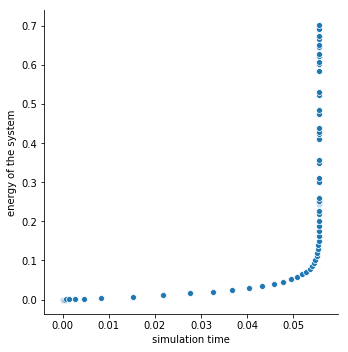

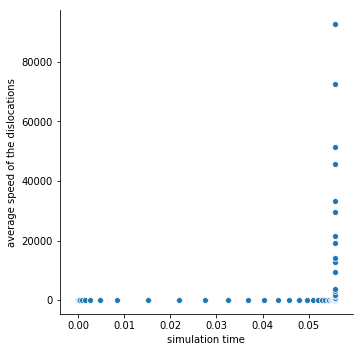

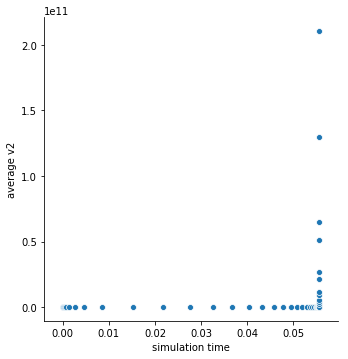

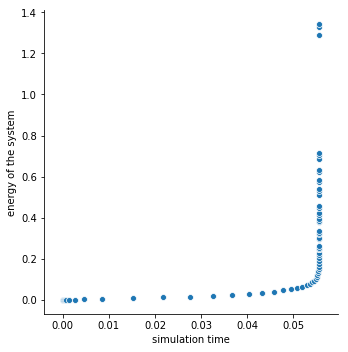

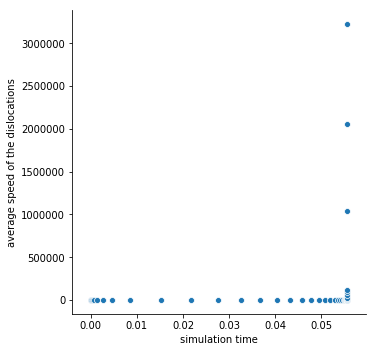

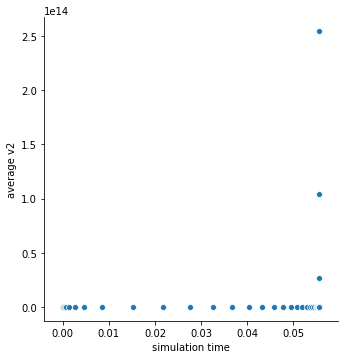

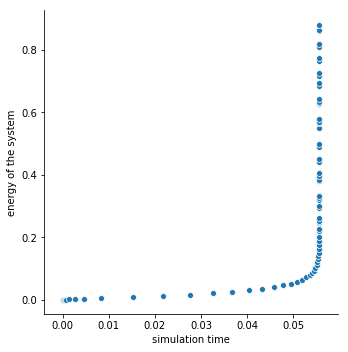

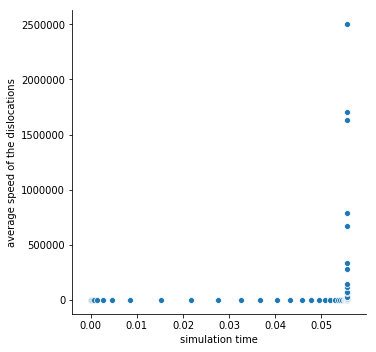

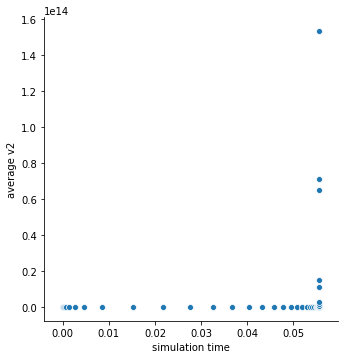

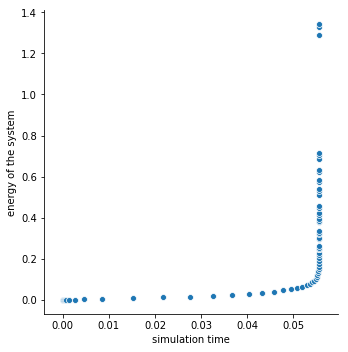

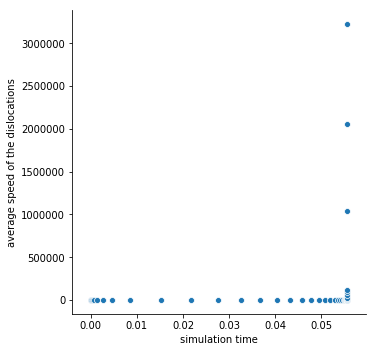

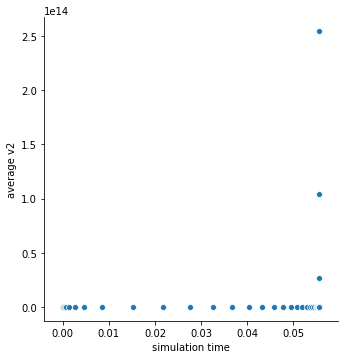

In [44]:
for analytic, file in zip(analytics, os.listdir('./analytic_stress_field/')):
    saveImages(analytic, file)

In [ ]:
"""
./sdddst --dislocation-configuration test_input.dat --result-dislocation-configuration test_output.dat
--logfile-path dat_32.log --time-limit 500  --periodic-stress-field-analytic
"""